## Task III - Studying the Impact of Data Pre-processing and Outlier Removal on the Prediction Accuracy
### EQ 2420 - Network Analytics

Ruihan Zhang
Nov 10, 2022

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.metrics
print('pandas =', pd.__version__)
print('numpy =', np.__version__)

X_VoD = pd.read_csv('./JNSM_VoD_flashcrowd_2/X.csv').drop(columns=['TimeStamp','Unnamed: 0'])
Y_VoD = pd.read_csv('./JNSM_VoD_flashcrowd_2/Y.csv').drop(columns=['TimeStamp','Unnamed: 0'])['DispFrames']
X_KV = pd.read_csv('./JNSM_KV_flashcrowd_2/X.csv').drop(columns=['TimeStamp','Unnamed: 0'])
Y_KV = pd.read_csv('./JNSM_KV_flashcrowd_2/Y.csv').drop(columns=['TimeStamp','Unnamed: 0'])['ReadsAvg']

pandas = 1.4.4
numpy = 1.23.4


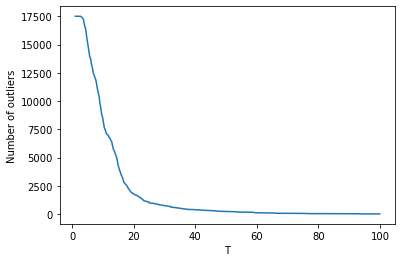

In [13]:
# outlier distribution graph
from sklearn import preprocessing
X = preprocessing.scale(X_VoD.to_numpy(), axis=0)
num = []
for T in np.arange(1,100,0.1):
    n = X.shape[0] - (np.abs(X) < T).all(axis=1).sum()
    num.append(n)
plt.plot(np.arange(1,100,0.1), num)
plt.ylabel('Number of outliers')
plt.xlabel('T')
plt.show()

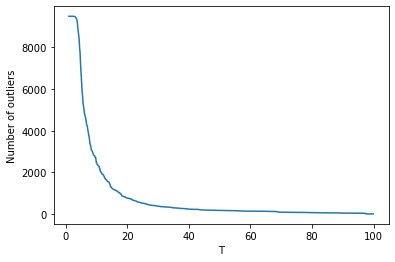

In [14]:
X = preprocessing.scale(X_KV.to_numpy(), axis=0)
num = []
for T in np.arange(1,100,0.1):
    n = X.shape[0] - (np.abs(X) < T).all(axis=1).sum()
    num.append(n)
plt.plot(np.arange(1,100,0.1), num)
plt.ylabel('Number of outliers')
plt.xlabel('T')
plt.show()

In [15]:
# our selected features using tree-based method.
select_KV = np.load('select_KV.npy')
select_VoD = np.load('select_VoD.npy')
print(X_KV.columns[sorted(select_KV)])
print(X_VoD.columns[sorted(select_KV)])

Index(['0_i132_intr.s', '0_i133_intr.s', '0_irec.s', '0_idel.s', '0_orq.s',
       '0_iseg.s', '0_oseg.s', '1_i127_intr.s', '1_i128_intr.s', '1_oseg.s',
       '2_idel.s', '2_iseg.s', '3_i128_intr.s', '3_idel.s', '3_iseg.s',
       '3_oseg.s'],
      dtype='object')
Index(['0_bread.s', '0_bwrtn.s', '1_all_..iowait', '1_all_..idle',
       '1_cpu0_.usr', '1_cpu0_.soft', '1_cpu0_.idle', '1_dev252.0_wr_sec.s',
       '1_dev252.0_avgrq.sz', '2_cpu9_.idle', '3_cpu9_.iowait',
       '3_cpu11_.nice', '3_dev8.5_avgqu.sz', '4_cpu4_.iowait', '4_cpu5_.sys',
       '4_cpu5_.iowait'],
      dtype='object')


In [16]:
# draw ramdom samples from the dataset to form training set and test set
from sklearn.model_selection import train_test_split

X_KV_train, X_KV_test, Y_KV_train, Y_KV_test = train_test_split(X_KV, Y_KV, test_size=0.3)

X_VoD_train, X_VoD_test, Y_VoD_train, Y_VoD_test = train_test_split(X_VoD, Y_VoD, test_size=0.3)

In [17]:
def NMAE(y_true, y_pred):
    return abs(y_true - y_pred).mean() / abs(y_pred.mean())

In [22]:
from sklearn import neural_network
def train(x_train, y_train):
    regr = sklearn.linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    n1 = NMAE(y_test, y_pred)

    regr = sklearn.ensemble.RandomForestRegressor(n_jobs=-1)
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    n2 = NMAE(y_test, y_pred)

    regr = neural_network.MLPRegressor(hidden_layer_sizes=(10,10,10,10),  learning_rate_init=1e-4, max_iter=3000)
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    n3 = NMAE(y_test, y_pred)
    return n1, n2, n3

In [23]:
from sklearn import preprocessing as p
r = np.zeros((7,3))
x_train = X_VoD_train
x_test = X_VoD_test

y_train = Y_VoD_train
y_test = Y_VoD_test

r[0,:] = train(x_train, y_train)

x_train = p.normalize(X_VoD_train, axis=1)
x_test = p.normalize(X_VoD_test, axis=1)
r[1,:] = train(x_train, y_train)

x_train = p.normalize(X_VoD_train, axis=0)
x_test = p.normalize(X_VoD_test, axis=0)
r[2,:] = train(x_train, y_train)

x_train = p.minmax_scale(X_VoD_train, axis=1)
x_test = p.minmax_scale(X_VoD_test, axis=1)
r[3,:] = train(x_train, y_train)

x_train = p.minmax_scale(X_VoD_train, axis=0)
x_test = p.minmax_scale(X_VoD_test, axis=0)
r[4,:] = train(x_train, y_train)

x_train = p.scale(X_VoD_train, axis=1)
x_test = p.scale(X_VoD_test, axis=1)
r[5,:] = train(x_train, y_train)

x_train = p.scale(X_VoD_train, axis=0)
x_test = p.scale(X_VoD_test, axis=0)
r[6,:] = train(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
r2 = np.zeros((7,3))
x_train = X_KV_train
x_test = X_KV_test

y_train = Y_KV_train
y_test = Y_KV_test

r2[0,:] = train(x_train, y_train)

x_train = p.normalize(X_KV_train, axis=1)
x_test = p.normalize(X_KV_test, axis=1)
r2[1,:] = train(x_train, y_train)

x_train = p.normalize(X_KV_train, axis=0)
x_test = p.normalize(X_KV_test, axis=0)
r2[2,:] = train(x_train, y_train)

x_train = p.minmax_scale(X_KV_train, axis=1)
x_test = p.minmax_scale(X_KV_test, axis=1)
r2[3,:] = train(x_train, y_train)

x_train = p.minmax_scale(X_KV_train, axis=0)
x_test = p.minmax_scale(X_KV_test, axis=0)
r2[4,:] = train(x_train, y_train)

x_train = p.scale(X_KV_train, axis=1)
x_test = p.scale(X_KV_test, axis=1)
r2[5,:] = train(x_train, y_train)

x_train = p.scale(X_KV_train, axis=0)
x_test = p.scale(X_KV_test, axis=0)
r2[6,:] = train(x_train, y_train)

In [71]:
r.mean(axis=1) # Performing minmax_scale or standard-scale on each feature column works best.

array([0.46499242, 0.10925582, 0.50508922, 0.11182329, 0.09719068,
       0.11211739, 0.09769105])

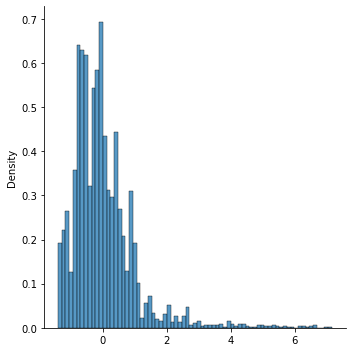

In [87]:
import seaborn as sns
x_train = p.scale(X_VoD_train, axis=0) #column wise
x_test = p.scale(X_VoD_test, axis=0)
sns.displot(x_test[:,2], stat="density")

In [108]:
from scipy import stats
T = 5
x_cut = x_train[(np.abs(stats.zscore(x_train)) < T).all(axis=1)]
y_cut = y_train[(np.abs(stats.zscore(x_train)) < T).all(axis=1)]

Text(0.5, 0, 'T')

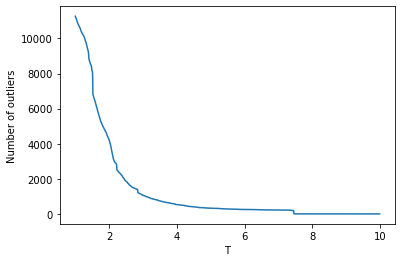

In [146]:
num = []
for T in np.arange(1,10,0.01):
    n = x_train.shape[0] - (np.abs(stats.zscore(x_train)) < T).all(axis=1).sum()
    num.append(n)
plt.plot(np.arange(1,10,0.01), num)
plt.ylabel('Number of outliers')
plt.xlabel('T')

Text(0.5, 0, 'T')

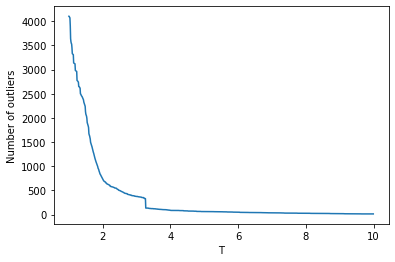

In [145]:
num = []
for T in np.arange(1,10,0.01):
    n = X_KV_train.shape[0] - (np.abs(stats.zscore(X_KV_train)) < T).all(axis=1).sum()
    num.append(n)
plt.plot(np.arange(1,10,0.01), num)
plt.ylabel('Number of outliers')
plt.xlabel('T')

In [38]:


n1 = [] # linear
n2 = [] # Random forest

X = preprocessing.scale(X_KV.to_numpy(), axis=0)
Y = Y_KV.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_test = x_test[:,select_KV]

num = []
for T in np.arange(5,100,5):
    x_cut = x_train[(np.abs(x_train) < T).all(axis=1)]
    y_cut = y_train[(np.abs(x_train) < T).all(axis=1)]

    x_cut = x_cut[:,select_KV]
    

    regr = sklearn.linear_model.LinearRegression()
    regr.fit(x_cut, y_cut)
    y_pred = regr.predict(x_test)
    n1.append(NMAE(y_test, y_pred))

    regr = sklearn.ensemble.RandomForestRegressor(n_jobs=-1)
    regr.fit(x_cut, y_cut)
    y_pred = regr.predict(x_test)
    n2.append(NMAE(y_test, y_pred))

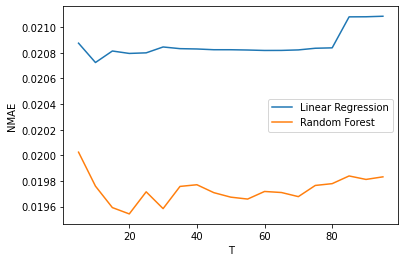

In [39]:
plt.plot(np.arange(5,100,5), n1, label='Linear Regression' )
plt.plot(np.arange(5,100,5), n2, label='Random Forest')
plt.ylabel('NMAE')
plt.xlabel('T')
plt.legend()

In [36]:
n1 = [] # linear
n2 = [] # Random forest

X = preprocessing.scale(X_VoD.to_numpy(), axis=0)
Y = Y_VoD.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_test = x_test[:,select_VoD]

num = []
for T in np.arange(5,100,5):
    x_cut = x_train[(np.abs(x_train) < T).all(axis=1)]
    y_cut = y_train[(np.abs(x_train) < T).all(axis=1)]

    x_cut = x_cut[:,select_VoD]
    

    regr = sklearn.linear_model.LinearRegression()
    regr.fit(x_cut, y_cut)
    y_pred = regr.predict(x_test)
    n1.append(NMAE(y_test, y_pred))


    regr = sklearn.ensemble.RandomForestRegressor(n_jobs=-1)
    regr.fit(x_cut, y_cut)
    y_pred = regr.predict(x_test)
    n2.append(NMAE(y_test, y_pred))

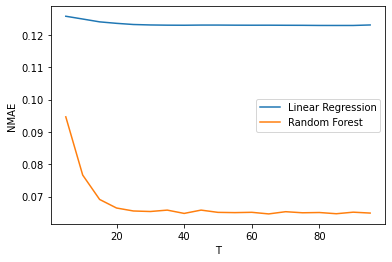

In [37]:
plt.plot(np.arange(5,100,5), n1, label='Linear Regression' )
plt.plot(np.arange(5,100,5), n2, label='Random Forest')
plt.ylabel('NMAE')
plt.xlabel('T')
plt.legend()